### Boston Housing Data Analysis Project
### By
### Favour Uwaishe
### Digital uplift Data Science Bootcamp
#
#

# Import Libraries

In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
%matplotlib inline
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


#import io


# Load Dataset

In [5]:
#load dataset

df = pd.read_csv(r'C:\Users\Fay\Downloads\data_science_digital_uplift\project1\boston_housing.csv')

#from google.colab import files
#uploaded = files.upload()


df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [49]:

#df = pd.read_csv(io.BytesIO(uploaded['boston_housing.csv']))

#df.head()

# Data wrangling/exploration

In [4]:
#data wrangling/exploration

df.drop(columns=['Unnamed: 0'], inplace=True)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB



####      ----> There are no null values in the dataset.



#

# Data Mining



#
## The Median Value of Owner Occupied Homes.


In [9]:
df[['MEDV']].describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [10]:
df[['MEDV']].var()

,0
MEDV,84.586724



#### ----> The mean for MEDV is 22.5
#### ----> The standard deviation is 9
#### ----> The variance is 84.5


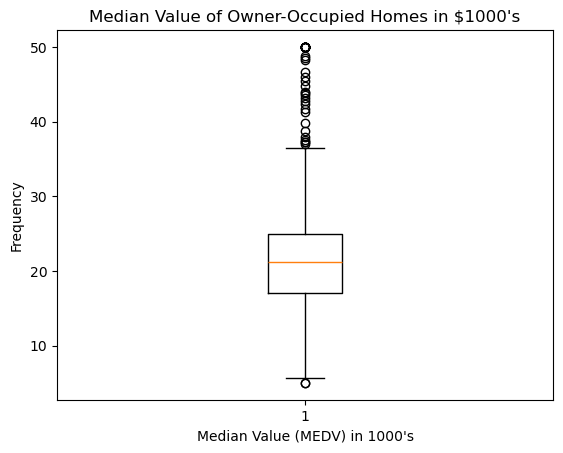

In [45]:

#boxplot of variable


pyplot.boxplot(df['MEDV'])

pyplot.xlabel("Median Value (MEDV) in 1000's")
pyplot.ylabel("Frequency")
pyplot.title("Median Value of Owner-Occupied Homes in $1000's")

pyplot.show()


#### ---->  BOXPLOT shows normal distribution with some outliers

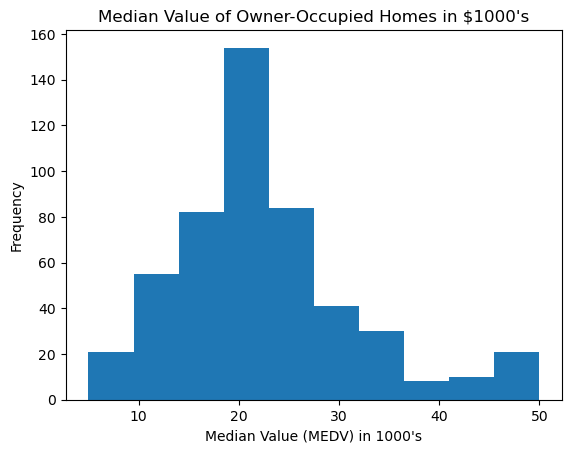

In [47]:

# Histogram of variable

pyplot.hist(df['MEDV'])

pyplot.xlabel("Median Value (MEDV) in 1000's")
pyplot.ylabel("Frequency")
pyplot.title("Median Value of Owner-Occupied Homes in $1000's")

pyplot.show()

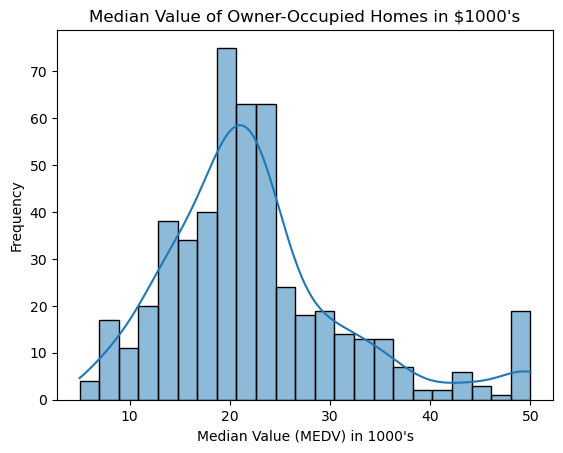

In [51]:

# Histplot of variable

sns.histplot(df['MEDV'], kde=True)

pyplot.xlabel("Median Value (MEDV) in 1000's")
pyplot.ylabel("Frequency")
pyplot.title("Median Value of Owner-Occupied Homes in $1000's")

pyplot.show()


#### ----> The distribution of MEDV is only slightly skewed to the right. We can assume normal distribution.


#
## Charles River Dummy Variable


In [59]:
#chas_freq = pd.crosstab(df.CHAS, columns="count")

#chas_freq

In [61]:
df.CHAS.unique() #identifying the unique variables under CHAS

array([0., 1.])

In [63]:
df.CHAS.value_counts() #identifying the number of unique variables under CHAS

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

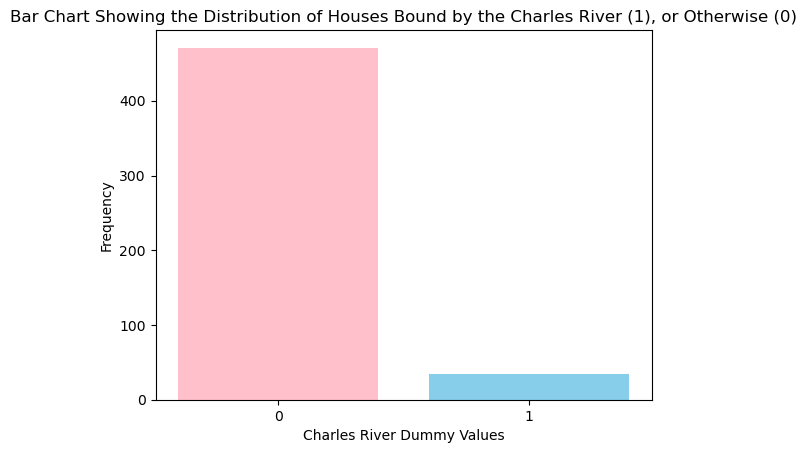

In [86]:

#Barchart of variable

pyplot.bar(df.CHAS.unique(), df.CHAS.value_counts(), color=['pink', 'skyblue'])

pyplot.xlabel("Charles River Dummy Values")
pyplot.ylabel("Frequency")
pyplot.title("Bar Chart Showing the Distribution of Houses Bound by the Charles River (1), or Otherwise (0)")
pyplot.xticks([0, 1])

pyplot.show()


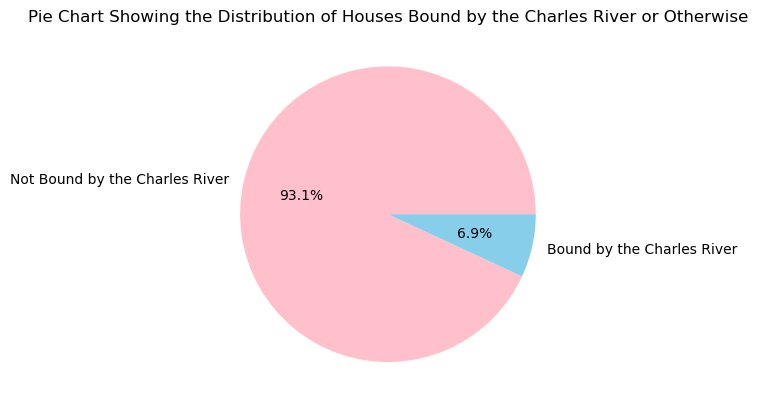

In [88]:
#Pie chart of variable

pyplot.pie(df.CHAS.value_counts(), labels=['Not Bound by the Charles River','Bound by the Charles River'], colors=['pink', 'skyblue'], autopct='%1.1f%%')

pyplot.title("Pie Chart Showing the Distribution of Houses Bound by the Charles River or Otherwise")

pyplot.show()


#### ----> 471 houses or 93.1% are not bound by the charles river.
#### ----> 35 houses or 6.9% are bound by the charles river.



#
## Pupil-Teacher Ratio


In [24]:
df[['PTRATIO']].describe()

,PTRATIO
count,506.000000
mean,18.455534
std,2.164946
min,12.600000
25%,17.400000
50%,19.050000
75%,20.200000
max,22.000000


In [25]:
df[['PTRATIO']].var()

,0
PTRATIO,4.686989


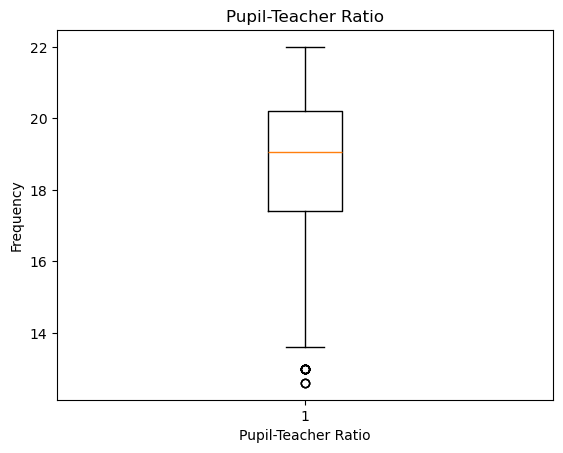

In [92]:
# boplot of variable

pyplot.boxplot(df['PTRATIO'])

pyplot.xlabel("Pupil-Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.title("Pupil-Teacher Ratio")

pyplot.show()

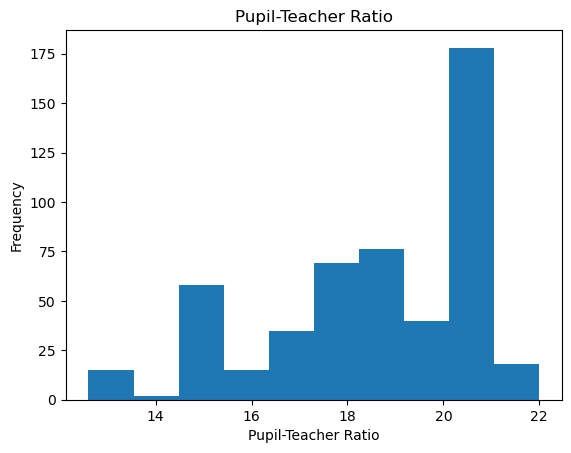

In [94]:
# histogram of variable

pyplot.hist(df['PTRATIO'])

pyplot.xlabel("Pupil-Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.title("Pupil-Teacher Ratio")

pyplot.show()

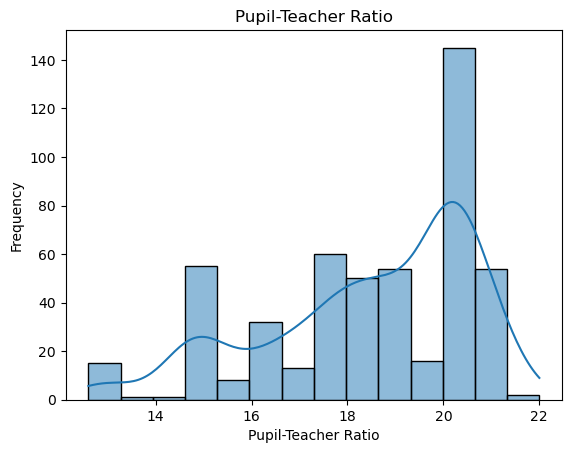

In [96]:
# histplot of variable

sns.histplot(df['PTRATIO'], kde=True)

pyplot.xlabel("Pupil-Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.title("Pupil-Teacher Ratio")

pyplot.show()


#### ----> The distribution of pupil-teacher ratio is slightly skewed to the left, but normal distribution can still be assumed.
#### ----> The mean is 18.5
#### ----> The standard deviation is 2.2
#### ----> The variance is 4.7


#
## Pupil teacher ratio in relation to median value


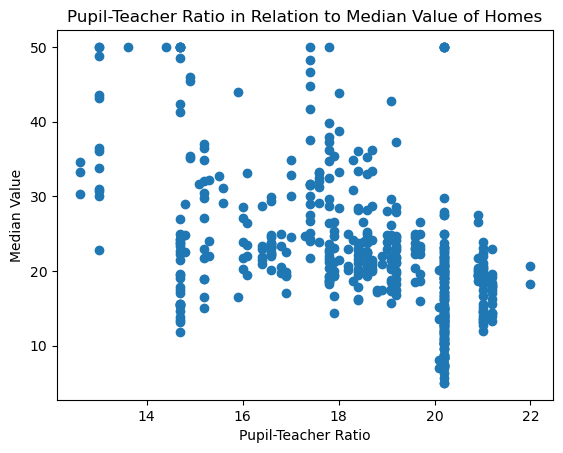

In [98]:
#scatterplot of variable

pyplot.scatter(df['PTRATIO'], df['MEDV'])

pyplot.xlabel("Pupil-Teacher Ratio")
pyplot.ylabel("Median Value")
pyplot.title("Pupil-Teacher Ratio in Relation to Median Value of Homes")

pyplot.show()

In [32]:
# CORRELATION COEFFICIENT
np.corrcoef(df['PTRATIO'], df['MEDV'])

array([[ 1.        , -0.50778669],
       [-0.50778669,  1.        ]])


#### ----> The scatter plot is more concentrated on the bottom which could show that the higher the pupil-teacher ratio, the lower the median value.

#### ----> There is a moderate negative correlation of -0.5 which indicates that the higher the pupil-teacher ratio, the lower the median value.

#
## MEDV variable vs the AGE variable


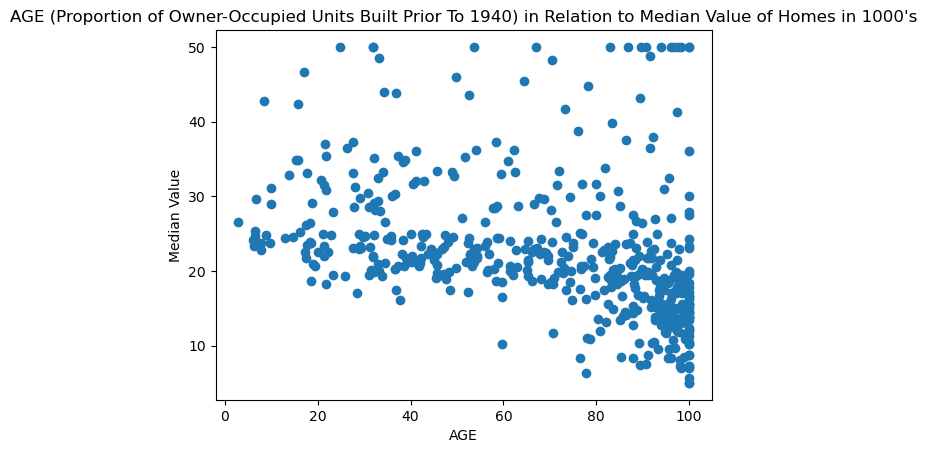

In [121]:
#scatterplot of variables

pyplot.scatter(df['AGE'], df['MEDV'])

pyplot.xlabel("AGE")
pyplot.ylabel("Median Value")
pyplot.title("AGE (Proportion of Owner-Occupied Units Built Prior To 1940) in Relation to Median Value of Homes in 1000's")

pyplot.show()

In [105]:
# CORRELATION COEFFICIENT
cm = np.corrcoef(df['AGE'], df['MEDV'])

cm



array([[ 1.        , -0.37695457],
       [-0.37695457,  1.        ]])

#### ----> moderate negative correlation (-0.38) - as the proportion of homes buit before 1940 increases, the median value tends to decrease.


#### ---->  From the scatterplot, Most of the units built prior to 1940 have lower median value.


#

## Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.



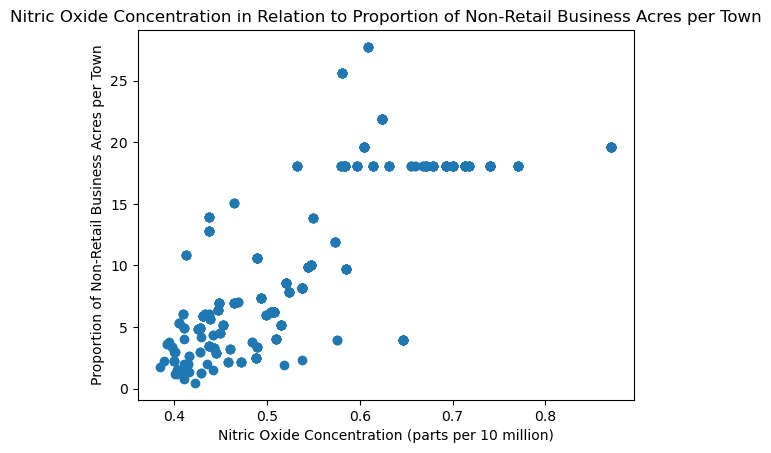

In [123]:
#scatterplot of variables

pyplot.scatter(df['NOX'], df['INDUS'])

pyplot.xlabel("Nitric Oxide Concentration (parts per 10 million)")
pyplot.ylabel("Proportion of Non-Retail Business Acres per Town")
pyplot.title("Nitric Oxide Concentration in Relation to Proportion of Non-Retail Business Acres per Town")

pyplot.show()

In [125]:
# CORRELATION COEFFICIENT
np.corrcoef(df['NOX'], df['INDUS'])




array([[1.        , 0.76365145],
       [0.76365145, 1.        ]])

#### ----> There is a strong positive linear correlation of 0.76, which indicates that both variables are dependent on each other.
#### ----> in this case, the lower the proportion of non retain business acres, the lower the nitric oxide concentrations, and the reverse is probable the same case.

#### -- REGRESSION --

#### NULL HYPOTHESIS: There is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
#### ALTERNATE HYPOTHESIS: There is a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
#### α = 0.05

In [130]:

# REGRESSION

# NULL HYPOTHESIS: There is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
# ALTERNATE HYPOTHESIS: There is a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
# α = 0.05

x = df['NOX']
y = df['INDUS']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           7.91e-98
Time:                        17:21:12   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ----> the pvalue is less than 0.05, which indivates that there is a relationship between the two variables.

#
## -- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
#### ----> The answer is no, our findings indicate that:

#### ----> Lower proportions of Non-Retail Business Acres towns have lower nitric oxides concentrations (parts per 10 million)


#
## Is there a significant difference in the median value of houses bounded by the Charles river or not?

#### CHAR: independent categorical with two levels; MEDV: dependent continuos, so we use t-test

#### T-TEST

#### NULL HYPOTHESIS: There is no significant difference in the value of houses bound by the charles river and those that are not.
#### ALTERNATE HYPOTHESIS: There is a significant difference in the value of houses bound by the charles river and those that are not.
#### α = 0.05

#### we go ahead assuming normal distribution based on our charts.

Text(0.5, 1.0, 'Normal Distribution')

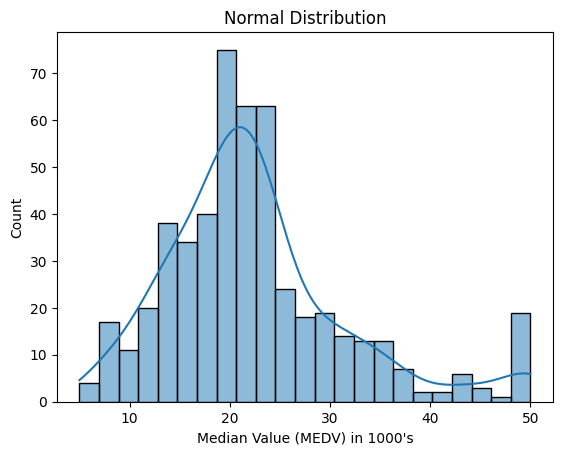

In [46]:
sns.histplot(df['MEDV'], kde=True)

pyplot.xlabel("Median Value (MEDV) in 1000's")
pyplot.title("Normal Distribution")

In [149]:
#initializing variables for both instances

charles_r_bound_h = df[df['CHAS'] == 1]['MEDV']
non_charles_r_bound_h = df[df['CHAS'] == 0]['MEDV']






#### levene test to assess equality of variance

#### levene's null hypothesis: The pvalue will be less than the alpha value of 0.05.
#### levene's alternate hyphothesis: The pvalue will be greater than the alpha value of 0.05.


In [153]:
#levene test

scipy.stats.levene(charles_r_bound_h, non_charles_r_bound_h, center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)


#### ----> the pvalue is 0.003

#### ----> since the pvalue is less than our alpha value of 0.05, the variance is not equal. and hence, we use the welch t-test.



In [158]:
#welch t-test

scipy.stats.ttest_ind(charles_r_bound_h, non_charles_r_bound_h, equal_var=False)


TtestResult(statistic=3.113291312794837, pvalue=0.0035671700981375174, df=36.876408797611994)

#### ----> our pvalue is 0.003, which is less than our alpha value of 0.05.
#### ----> hence: we reject the null hyphothesis, and so:

#### ----> There is a significant difference in median value between houses bound by the charles river and those not bound by it.



#
## Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?



#### ----> ANOVA

#### ----> NULL HYPOTHESIS: There is no difference in median values of houses of each proportion of owner-occupied units built before 1940.
#### ----> ALTERNATE HYPOTHESIS: There is a difference in median values of houses of each proportion of owner-occupied units built before 1940.


In [171]:
df[['AGE']].describe()

# maximum value is 100, minimum is 2.9. no negative values.

,AGE
count,506.000000
mean,68.574901
std,28.148861
min,2.900000
25%,45.025000
50%,77.500000
75%,94.075000
max,100.000000


In [169]:

# dividing AGE variable into proportion categories

df.loc[(df['AGE'] <= 25), 'age_prop'] = 'under 25 percent'
df.loc[(df['AGE'] > 25) & (df['AGE'] <= 50), 'age_prop'] = '25 to 50 percent'
df.loc[(df['AGE'] > 50) & (df['AGE'] <= 75), 'age_prop'] = '50 to 75 percent'
df.loc[(df['AGE'] > 75), 'age_prop'] = 'over 75 percent'

df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_prop
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,50 to 75 percent
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,over 75 percent
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,50 to 75 percent
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,25 to 50 percent
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,50 to 75 percent


#### ----> levine test
#### ----> levene's null hypothesis: The pvalue will be less than the alpha value of 0.05.
#### ----> levene's alternate hyphothesis: The pvalue will be greater than the alpha value of 0.05.

In [174]:
# levine test

scipy.stats.levene(df[df['age_prop'] == 'under 25 percent'] ['MEDV'],
                   df[df['age_prop'] == '25 to 50 percent'] ['MEDV'],
                   df[df['age_prop'] == '50 to 75 percent'] ['MEDV'],
                   df[df['age_prop'] == 'over 75 percent'] ['MEDV'],
                   center = 'mean')

LeveneResult(statistic=1.2774290995032782, pvalue=0.28139170079967424)


#### ----> The pvalue is 0.28, which is greater than our alpha value of 0.05, so we fail to reject the levene's null hypothesis.
#### ----> This indicates that there is no difference in the means.




In [188]:
#initializing variables for AGE proportion categories

under_25 = df[df['age_prop'] == 'under 25 percent'] ['MEDV']
twenty_fifty = df[df['age_prop'] == '25 to 50 percent'] ['MEDV']
fifty_seventyFive = df[df['age_prop'] == '50 to 75 percent'] ['MEDV']
over_seventyFive = df[df['age_prop'] == 'over 75 percent'] ['MEDV']

In [190]:
# performing one way ANOVA.

scipy.stats.f_oneway(under_25, twenty_fifty, fifty_seventyFive, over_seventyFive)




F_onewayResult(statistic=25.549830466017518, pvalue=2.137213473971852e-15)


#### ----> pvalue of 0.00000000000000214


#### ---->  pvalue is significantly smaller than alpha value.
#### ---->  This suggest that there is a significant difference in median values of houses of each proportion of owner-occupied units built before 1940.




## What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?



In [196]:
# CORRELATION COEFFICIENT
np.corrcoef(df['MEDV'], df['DIS'])



array([[1.        , 0.24992873],
       [0.24992873, 1.        ]])


#### ---->  There is a mild positive linear correlation of 0.25, which indicates that both variables are dependent on each other.
#### ---->  This means that any change in one is likely to impact the other.
#### ---->  it is very likely that if the distance to any of the 5 boston employment center increases, the median home value is likely to increase as well.


In [213]:
# regression model

#a = df['DIS']
#b = df['MEDV']

#a = sm.add_constant(a)

#model = sm.OLS(b, a).fit()
#predictions = model.predict(a)

#model.summary()


model = smf.ols('MEDV ~ DIS', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        17:36:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

#### ----> The p value is less than 0.05, 
#### ----> The coefficient of the DIS variable is 1.09

#### ----> The DIS coefficient of 1.09 suggests a positive correlation between the two variables.
#### ----> This means that as the weighted distance to the boston employment centers increases, the median home value is likely to increase as well.
#### ----> Since the coef value is 1.09, and the MEDV is recorded in 1000s, we can assume that:
#### ----> For every additional unit of increase in the weighted distance to the 5 boston employment centres, the median value of owner occupied homes is expected to increase by exactly $1,090.